In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

import warnings
warnings.simplefilter("ignore")

### London bike sharing

##### Dataset
https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset

"timestamp" - timestamp field for grouping the data</br>
"cnt" - the count of a new bike shares</br>
"t1" - real temperature in C</br>
"t2" - temperature in C "feels like"</br>
"hum" - humidity in percentage</br>
"windspeed" - wind speed in km/h</br>
"weathercode" - category of the weather</br>
"isholiday" - boolean field - 1 holiday / 0 non holiday</br>
"isweekend" - boolean field - 1 if the day is weekend</br>
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.</br>

"weathe_code" category description:</br>
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog


In [ ]:
bike_data = pd.read_csv('london_bikes_sample.csv')
bike_data.head()

,timestamp,cnt,t1,tF,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 14:00:00,1039,2.5,36.5,0.0,90.0,8.0,3.0,0.0,1.0,3.0
1,2015-01-04 15:00:00,869,2.0,35.6,-1.5,93.0,11.0,3.0,0.0,1.0,3.0
2,2015-01-04 20:00:00,328,3.0,37.4,3.0,93.0,4.0,3.0,0.0,1.0,3.0
3,2015-01-05 12:00:00,762,10.0,50.0,8.0,85.0,11.0,3.0,0.0,0.0,3.0
4,2015-01-05 19:00:00,1274,9.0,48.2,6.5,71.0,14.0,3.0,0.0,0.0,3.0


### 1. Исследуем признаки

In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     1000 non-null   object 
 1   cnt           1000 non-null   int64  
 2   t1            1000 non-null   float64
 3   tF            1000 non-null   float64
 4   t2            1000 non-null   float64
 5   hum           1000 non-null   float64
 6   wind_speed    1000 non-null   float64
 7   weather_code  1000 non-null   float64
 8   is_holiday    1000 non-null   float64
 9   is_weekend    1000 non-null   float64
 10  season        1000 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 86.1+ KB


**Q: Какие признаки и как мы можем преобразовать?**

In [ ]:
bike_data['year'] = pd.DatetimeIndex(bike_data['timestamp']).year
bike_data['month'] = pd.DatetimeIndex(bike_data['timestamp']).month
bike_data['hour'] = pd.DatetimeIndex(bike_data['timestamp']).hour

bike_data.drop('timestamp', axis = 1, inplace = True)

bike_data.head()

,cnt,t1,tF,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,hour
0,1039,2.5,36.5,0.0,90.0,8.0,3.0,0.0,1.0,3.0,2015,1,14
1,869,2.0,35.6,-1.5,93.0,11.0,3.0,0.0,1.0,3.0,2015,1,15
2,328,3.0,37.4,3.0,93.0,4.0,3.0,0.0,1.0,3.0,2015,1,20
3,762,10.0,50.0,8.0,85.0,11.0,3.0,0.0,0.0,3.0,2015,1,12
4,1274,9.0,48.2,6.5,71.0,14.0,3.0,0.0,0.0,3.0,2015,1,19


In [ ]:
bike_data.describe()

,cnt,t1,tF,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,hour
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.00,1000.000,1000.00,1000.000,1000.000,1000.000
mean,1152.729,12.320,54.177,11.347,72.474,16.124,2.790,0.02,0.288,1.52,2015.503,6.533,11.681
std,1085.927,5.513,9.924,6.580,14.137,7.960,2.359,0.14,0.453,1.13,0.500,3.523,6.877
min,17.000,-1.000,30.200,-3.500,28.500,0.000,1.000,0.00,0.000,0.00,2015.000,1.000,0.000
25%,271.500,8.000,46.400,6.000,63.000,10.000,1.000,0.00,0.000,1.00,2015.000,3.000,6.000
50%,857.000,12.000,53.600,12.000,74.500,15.000,2.000,0.00,0.000,2.00,2016.000,7.000,12.000
75%,1674.500,16.000,60.800,16.000,83.000,21.000,3.000,0.00,1.000,3.00,2016.000,10.000,18.000
max,4861.000,30.000,86.000,29.500,100.000,46.000,26.000,1.00,1.000,3.00,2016.000,12.000,23.000


<AxesSubplot:xlabel='season', ylabel='cnt'>

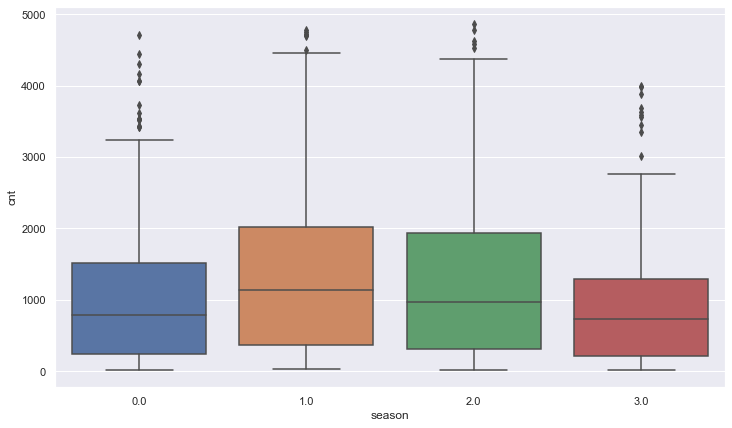

In [ ]:
plt.subplots(figsize=(12,7))
sns.boxplot(x=bike_data['season'], y=bike_data['cnt'])

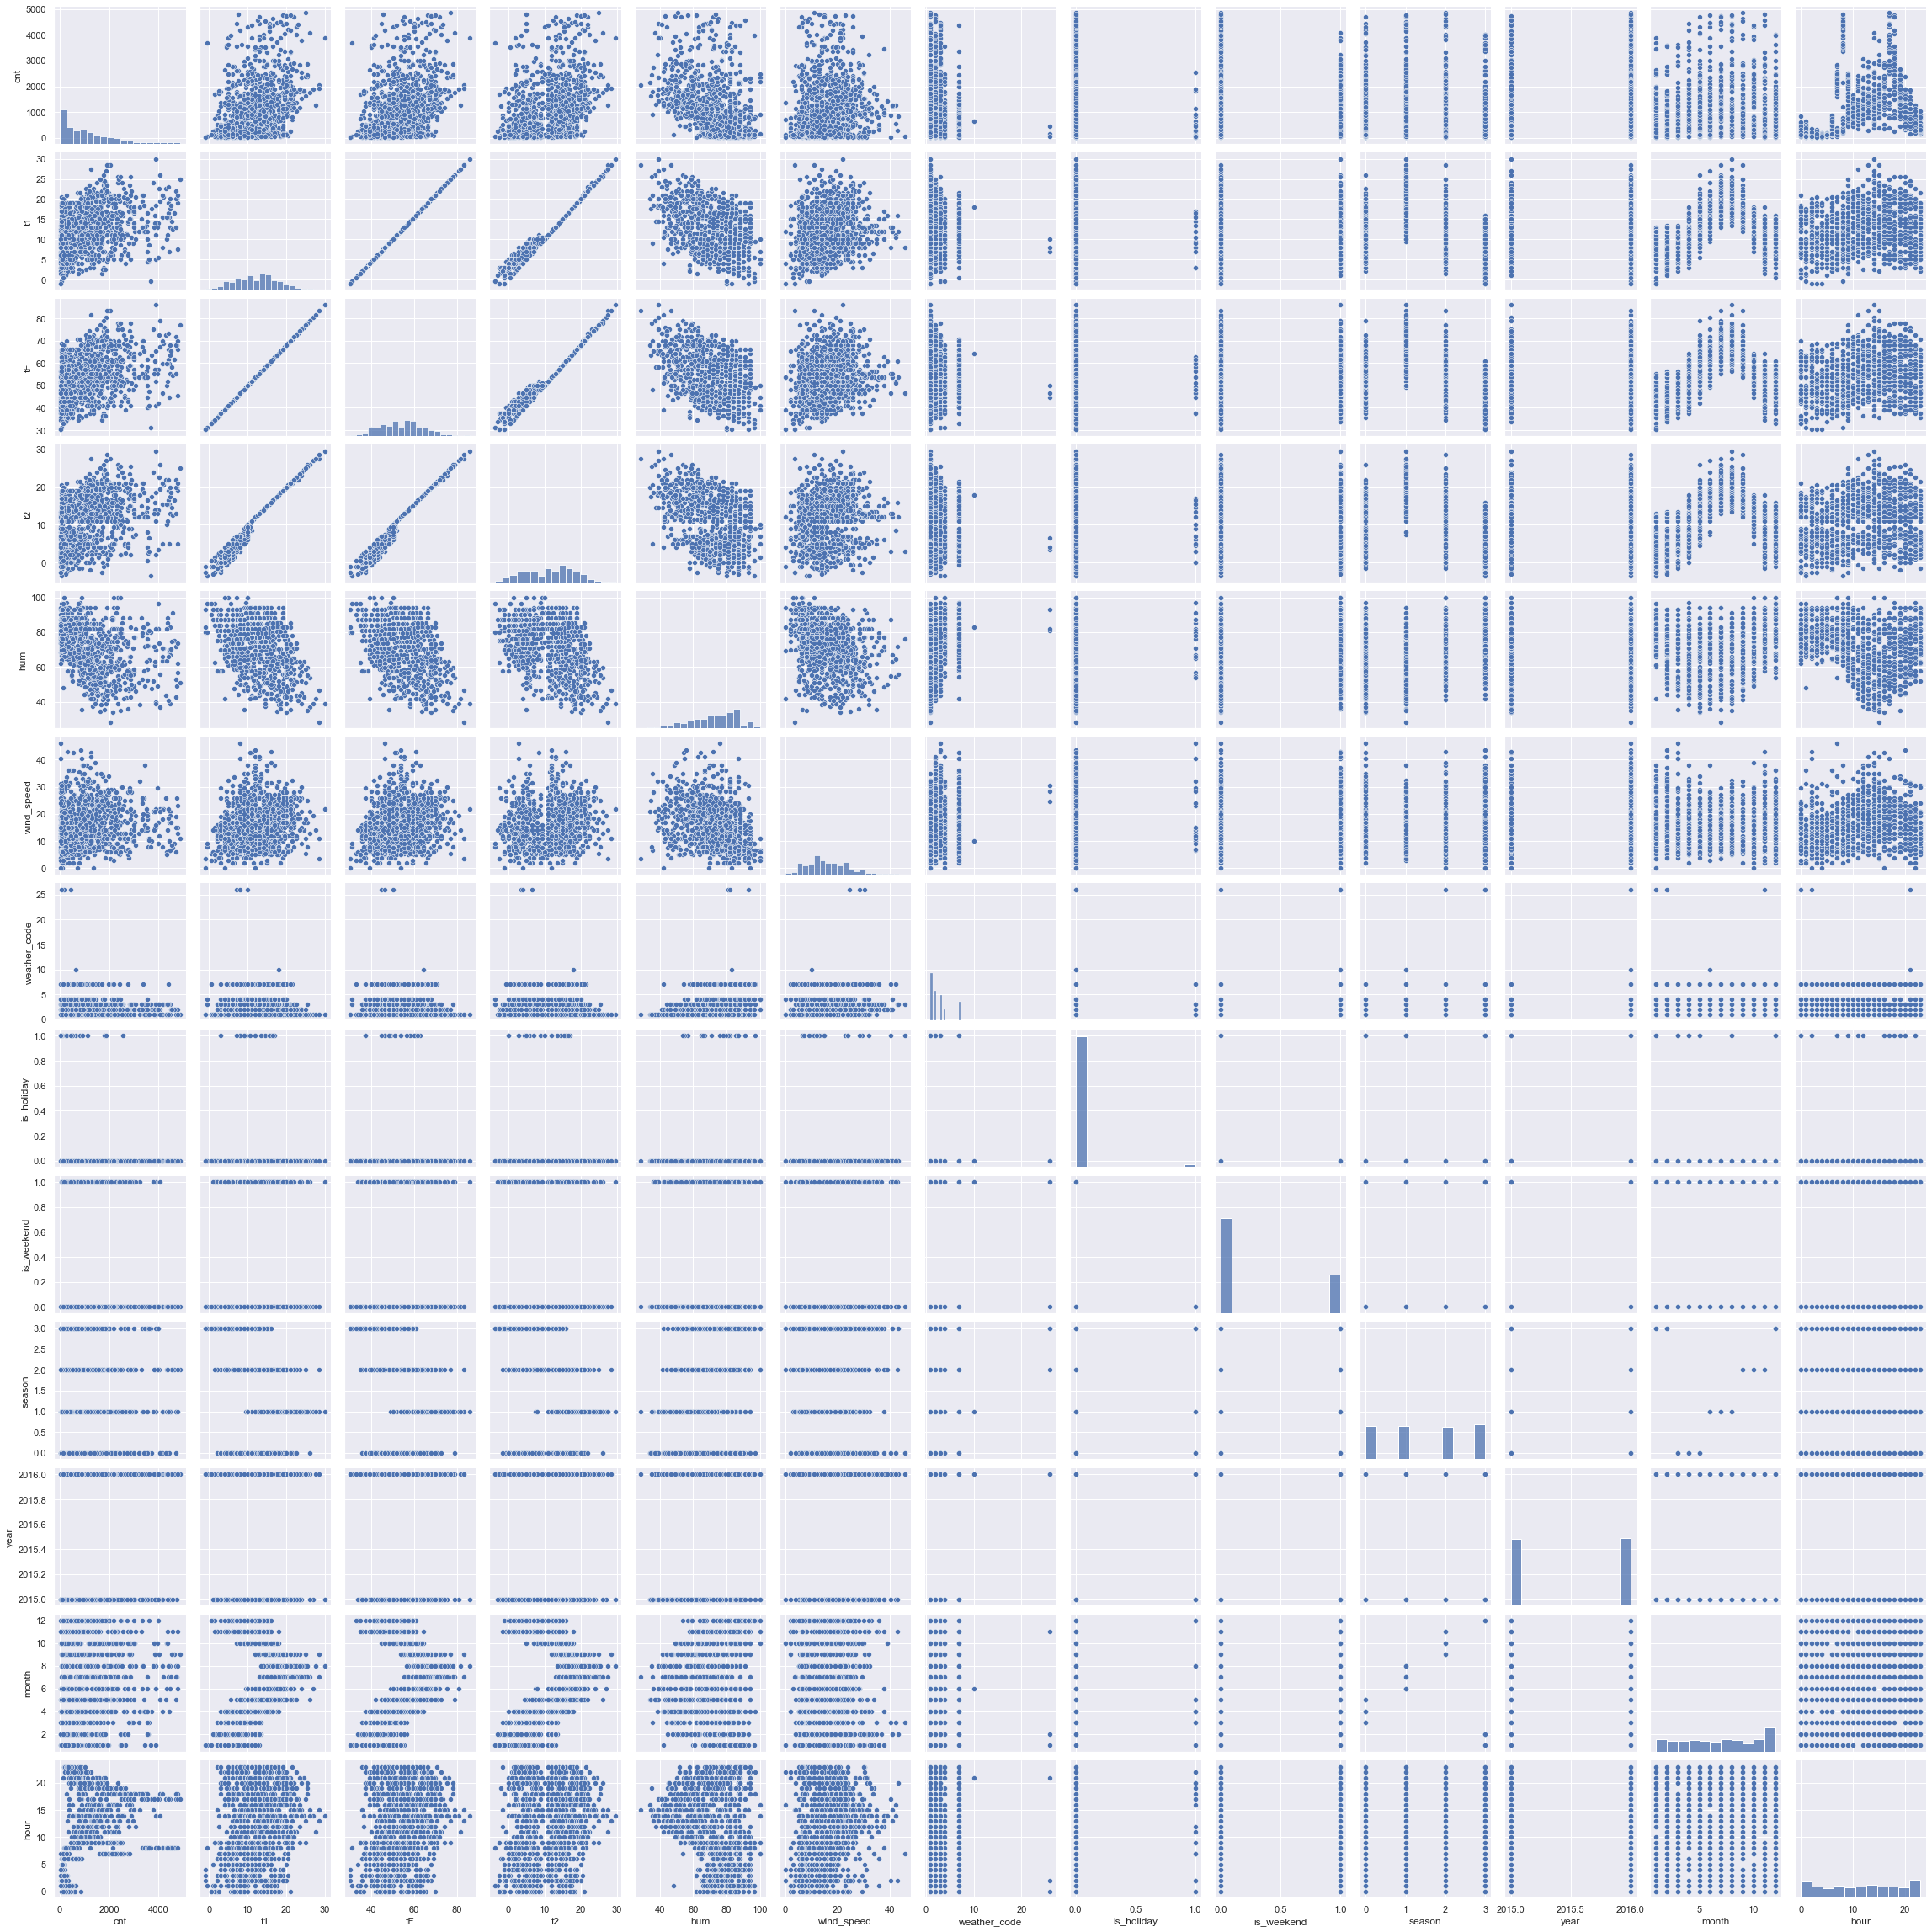

In [ ]:
sns.pairplot(bike_data)

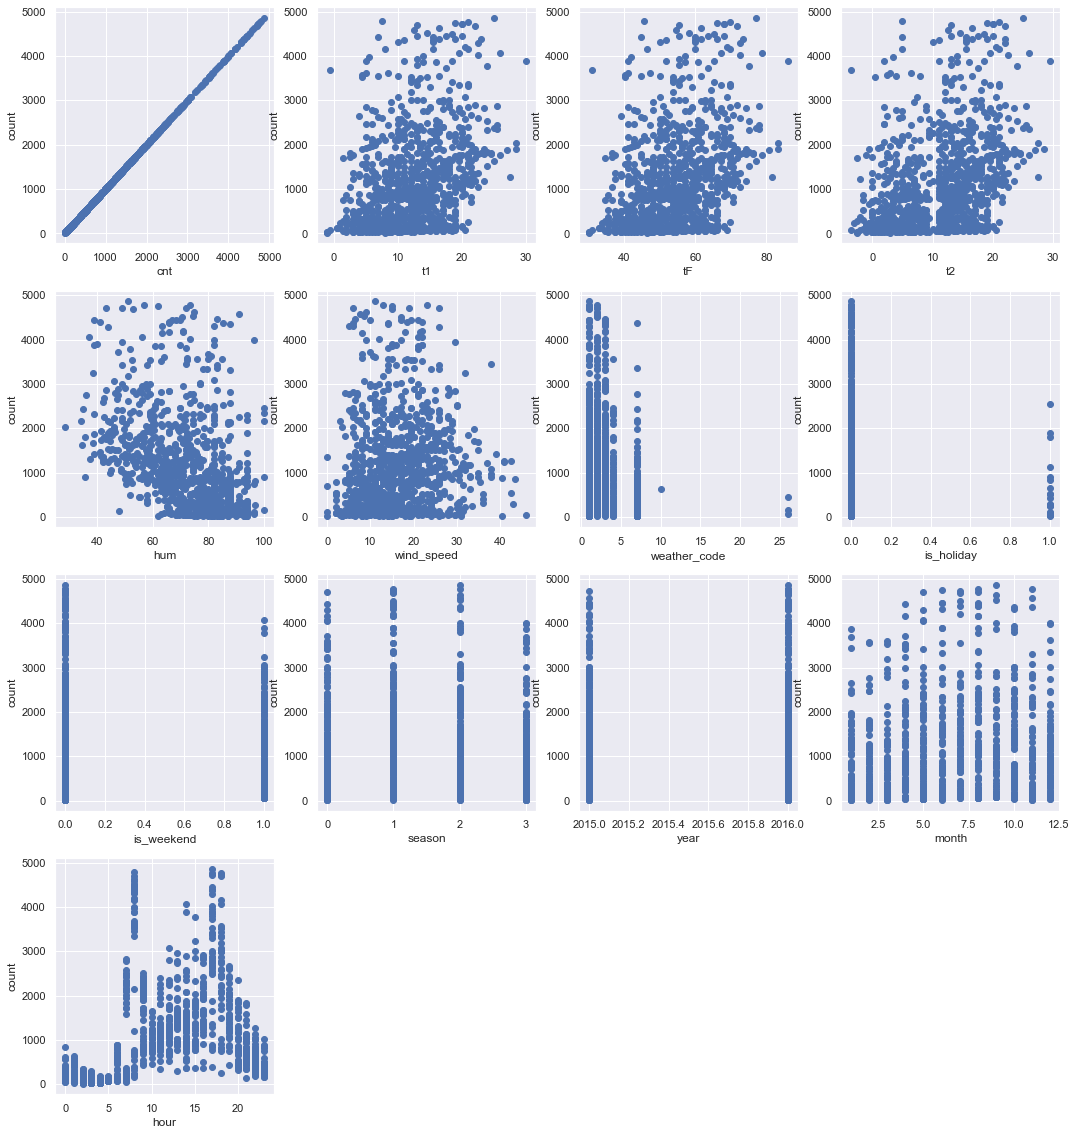

In [ ]:
plt.figure(figsize=(18,20))
for i, column in enumerate(bike_data.columns):
    plt.subplot(4, 4, i + 1)
    plt.scatter(bike_data[column], bike_data['cnt'])
    plt.xlabel(column)
    plt.ylabel('count')

<AxesSubplot:>

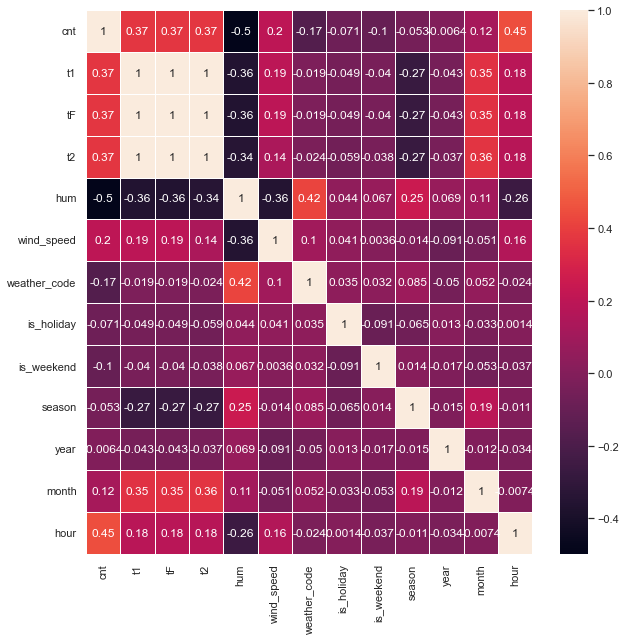

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(bike_data.corr(method='spearman'), annot = True, linewidths=0.7, ax=ax )

**Q: Какие признак(и) можно/нужно удалить из выборки?**

In [16]:
to_drop = ["tF"]

In [17]:
X, Y = bike_data.drop('cnt', axis = 1), bike_data['cnt']
X.head()

,t1,tF,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,hour
0,2.5,36.5,0.0,90.0,8.0,3.0,0.0,1.0,3.0,2015,1,14
1,2.0,35.6,-1.5,93.0,11.0,3.0,0.0,1.0,3.0,2015,1,15
2,3.0,37.4,3.0,93.0,4.0,3.0,0.0,1.0,3.0,2015,1,20
3,10.0,50.0,8.0,85.0,11.0,3.0,0.0,0.0,3.0,2015,1,12
4,9.0,48.2,6.5,71.0,14.0,3.0,0.0,0.0,3.0,2015,1,19


### 2. Сформируем тренировочную и тестовую выборки

In [18]:
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.3, shuffle = False)
X_train

,t1,tF,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,hour
0,2.5,36.5,0.0,90.0,8.0,3.0,0.0,1.0,3.0,2015,1,14
1,2.0,35.6,-1.5,93.0,11.0,3.0,0.0,1.0,3.0,2015,1,15
2,3.0,37.4,3.0,93.0,4.0,3.0,0.0,1.0,3.0,2015,1,20
3,10.0,50.0,8.0,85.0,11.0,3.0,0.0,0.0,3.0,2015,1,12
4,9.0,48.2,6.5,71.0,14.0,3.0,0.0,0.0,3.0,2015,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...
695,18.0,64.4,18.0,49.0,10.0,2.0,0.0,1.0,0.0,2016,5,15
696,13.5,56.3,13.5,85.0,6.0,7.0,0.0,1.0,0.0,2016,5,22
697,13.0,55.4,13.0,85.0,10.0,3.0,0.0,0.0,0.0,2016,5,23
698,10.0,50.0,9.0,79.0,8.0,1.0,0.0,0.0,0.0,2016,5,6


In [20]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

array([[-1.719, -1.719, -1.614, ..., -0.639, -1.283,  0.333],
       [-1.815, -1.815, -1.85 , ..., -0.639, -1.283,  0.479],
       [-1.622, -1.622, -1.142, ..., -0.639, -1.283,  1.207],
       ...,
       [ 0.304,  0.304,  0.43 , ...,  1.565, -0.145,  1.643],
       [-0.274, -0.274, -0.199, ...,  1.565, -0.145, -0.831],
       [ 0.015,  0.015,  0.194, ...,  1.565, -0.145,  1.352]])

### 3. Построим baseline модель

**Q: Придумайте самый простой способ формировать предсказания.**

In [21]:
def dummy_LR (X_train, X_test, Y_train, Y_test):
    
    Y_mean = Y_train.mean()
    
    return np.full(Y_test.shape, Y_mean)

dummy_LR_predictions = dummy_LR (X_train, X_test, Y_train, Y_test)

dummy_LR_MSE = metrics.mean_squared_error(Y_test, dummy_LR_predictions)

print (f'Dummy MSE = {round(dummy_LR_MSE, 3)}')

Dummy MSE = 1631312.956


### 4. Построим простую модель регрессии

In [22]:
simple_LR = LinearRegression()

simple_LR.fit(X_train_scaled, Y_train)

simple_LR_predictions = simple_LR.predict(X_test_scaled)

simple_LR_MSE = metrics.mean_squared_error(Y_test, simple_LR_predictions)

print (f'Simple LR MSE = {round(simple_LR_MSE,3)}')

Simple LR MSE = 1273501.019


In [23]:
simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared = False)

print (f'Simple LR RMSE = {round(simple_LR_RMSE, 3)}')

Simple LR RMSE = 1128.495


In [24]:
print (f'Test std: {round(Y_test.std(), 3)}')
print (f'Dummy RMSE = {round(metrics.mean_squared_error(Y_test, dummy_LR_predictions, squared = False), 3)}')

Test std: 1240.741
Dummy RMSE = 1277.229


Text(0, 0.5, 'Target')

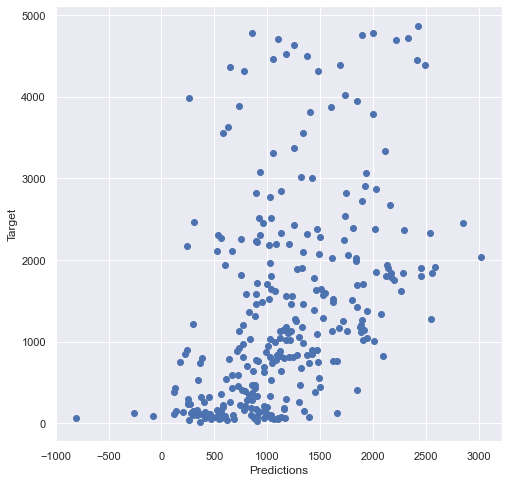

In [25]:
plt.figure(figsize=(8, 8))
plt.scatter(simple_LR_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [26]:
simple_LR.intercept_, simple_LR.coef_

(1067.4348291819128,
 array([-1.459e+16,  1.459e+16,  1.220e+02, -3.300e+02, -2.650e+01,
        -7.538e+01, -4.062e+01, -9.506e+01,  5.400e+01, -1.250e+01,
        -1.300e+01,  1.718e+02]))

In [27]:
pd.DataFrame(simple_LR.coef_, bike_data.columns[1:], columns=['Coefficients'])

,Coefficients
t1,-1.459e+16
tF,1.459e+16
t2,1.220e+02
hum,-3.300e+02
wind_speed,-2.650e+01
weather_code,-7.538e+01
is_holiday,-4.062e+01
is_weekend,-9.506e+01
season,5.400e+01
year,-1.250e+01


### 5. Применим регуляризацию

In [28]:
model = Lasso()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'Lasso RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, bike_data.columns[1:], columns=['Coefficients'])

Lasso RMSE = 1128.522


,Coefficients
t1,9.593e+01
tF,2.176e-14
t2,1.165e+02
hum,-3.295e+02
wind_speed,-2.661e+01
weather_code,-7.691e+01
is_holiday,-3.983e+01
is_weekend,-9.114e+01
season,5.570e+01
year,-1.067e+01


In [29]:
model = LassoCV(random_state=10)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'Lasso CV RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, bike_data.columns[1:], columns=['Coefficients'])

Lasso CV RMSE = 1130.573


,Coefficients
t1,34.050
tF,0.000
t2,147.194
hum,-314.258
wind_speed,-0.000
weather_code,-61.309
is_holiday,-20.888
is_weekend,-67.085
season,17.897
year,-0.000


In [30]:
model = Ridge()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'Ridge RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, bike_data.columns[1:], columns=['Coefficients'])

Ridge RMSE = 1129.448


,Coefficients
t1,50.241
tF,50.241
t2,114.759
hum,-329.102
wind_speed,-28.153
weather_code,-77.654
is_holiday,-40.559
is_weekend,-92.125
season,57.433
year,-12.130


In [31]:
model = RidgeCV()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'Ridge CV RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, bike_data.columns[1:], columns=['Coefficients'])

Ridge CV RMSE = 1129.168


,Coefficients
t1,60.541
tF,60.541
t2,94.490
hum,-323.180
wind_speed,-26.953
weather_code,-79.032
is_holiday,-40.710
is_weekend,-91.373
season,55.428
year,-11.673


In [32]:
alphas = np.linspace(1, 10, 20)
alphas

array([ 1.   ,  1.474,  1.947,  2.421,  2.895,  3.368,  3.842,  4.316,
        4.789,  5.263,  5.737,  6.211,  6.684,  7.158,  7.632,  8.105,
        8.579,  9.053,  9.526, 10.   ])

In [33]:
model = LassoCV(random_state = 10, alphas=alphas)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'Lasso CV RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, bike_data.columns[1:], columns=['Coefficients'])

Lasso CV RMSE = 1125.628


,Coefficients
t1,69.668
tF,0.000
t2,126.685
hum,-323.478
wind_speed,-11.416
weather_code,-72.190
is_holiday,-33.317
is_weekend,-82.056
season,40.015
year,-2.177


In [34]:
bike_data_dummy = pd.concat([bike_data.drop('weather_code', axis=1), 
                             pd.get_dummies(bike_data['weather_code'])], axis = 1)
bike_data_dummy.head()

,cnt,t1,tF,t2,hum,wind_speed,is_holiday,is_weekend,season,year,month,hour,1.0,2.0,3.0,4.0,7.0,10.0,26.0
0,1039,2.5,36.5,0.0,90.0,8.0,0.0,1.0,3.0,2015,1,14,0,0,1,0,0,0,0
1,869,2.0,35.6,-1.5,93.0,11.0,0.0,1.0,3.0,2015,1,15,0,0,1,0,0,0,0
2,328,3.0,37.4,3.0,93.0,4.0,0.0,1.0,3.0,2015,1,20,0,0,1,0,0,0,0
3,762,10.0,50.0,8.0,85.0,11.0,0.0,0.0,3.0,2015,1,12,0,0,1,0,0,0,0
4,1274,9.0,48.2,6.5,71.0,14.0,0.0,0.0,3.0,2015,1,19,0,0,1,0,0,0,0


In [35]:
X, Y = bike_data_dummy.drop(['cnt'], axis=1), bike_data_dummy['cnt']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

model = LassoCV(alphas=alphas)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, bike_data_dummy.columns[1:], 
             columns=['Coefficients']).sort_values('Coefficients')

RMSE = 1118.89


,Coefficients
hum,-348.121
is_weekend,-85.776
4.0,-71.229
wind_speed,-43.939
7.0,-43.352
is_holiday,-35.676
year,-5.880
26.0,-2.004
10.0,0.000
month,-0.000


### 6. Другие модели регрессии

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 10, n_estimators = 100)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.feature_importances_, bike_data_dummy.columns[1:], 
             columns=['Importance']).sort_values('Importance')

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')